### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [275]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np

# Import visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Import library modeling
import pycaret

import warnings
warnings.filterwarnings('ignore')

# Import library eksplorasi dataset
import pandas as pd
import numpy as np

# Import visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Import library modeling
import pycaret

import warnings
warnings.filterwarnings('ignore')


import plotly.graph_objs as go
from plotly.offline import iplot

import missingno as msno
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro 
import phik

import missingno as msno
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro 
import phik

import matplotlib.ticker as mtick

import distutils
from distutils.util import strtobool

import missingno as msno
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro 
import phik

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

### `Business Problem Understanding`

**Context**


Sebuah perusahaan yang bergerak di sektor telekomunikasi ingin meningkatkan retensi pelanggan (proses mempertahankan dan menarik pelanggan yang sudah ada, agar terus membeli produk atau menggunakan jasa yang ditawarkan oleh suatu perusahaan), dikarenakan sering ditemui pelanggan yang tidak menggunakan kembali layanan (Customer Churn) dari perusahaan telekomunikasi tersebut. Salah satu caranya dengan meningkatkan kepuasan pelanggan terhadap bisnis sesuai kebutuhannya, yaitu dengan melakukan pendekatan kepada pelanggan berupa perlakuan spesial atau penawaran menarik terkait kebutuhan pelanggan, agar pelanggan tersebut tetap kembali berlangganan (No Churn). 

Sebelumnya perusahaan menerapkan cara lama dalam memberikan penawaran tersebut, yaitu dengan menargetkan penawaran ke semua pelanggan tanpa mengetahui potensi pelanggan yang diberikan penawaran apakah akan kembali berlangganan atau tidak. Cara tersebut ternyata membuat biaya marketing yang dikeluarkan perusahaan  sangatlah besar, dan dampak dari banyaknya promosi layanan yang diberikan dapat menurunkan pendapatan perusahaan, serta memakan banyak waktu dan sumber daya dalam melakukan pendekatan kepada seluruh pelanggan. Oleh karena itu perusahaan ingin menargetkan penawaran tersebut hanya kepada pelanggan yang dirasa akan berhenti berlangganan di akhir periode, dan diharapkan pelanggan tersebut akan tertarik untuk menerima tawaran tersebut sehingga tidak jadi untuk berhenti berlangganan.



**Problem Statement**

Perusahaan ingin mengubah cara lama dalam memberikan melakukan strategi marketing berupa penawaran jasa yang sebelumnya penawaran tersebut diberikan kepada semua pelanggan menjadi pelanggan dengan kriteria tertentu saja yang diberikan penawaran, dan juga perusahaan ingin terlebih dahulu mengetahui bagaimana cara memprediksi jenis pelanggan agar menghasilkan kriteria tertentu (Churn atau tidak Churn) karena sebelumnya perusahaan tidak memiliki kemampuan tersebut. 

Adanya pembatasan pemberian penawaran ini dikarenakan perusahaan ingin meminimalkan biaya marketing yang dikeluarkan dan resiko kerugian dari banyaknya promosi layanan yang diberikan, serta efisiensi waktu dan sumber daya dalam melakukan pendekatan penawaran kepada pelanggan. Oleh karena itu, perusahaan ingin menargetkan pemberian penawaran hanya kepada pelanggan yang dirasa akan berhenti berlangganan di akhir periode, dan diharapkan pelanggan tersebut akan tertarik untuk menerima tawaran tersebut sehingga tidak jadi untuk berhenti berlangganan. Tentunya penawaran yang diberikan berkaitan dengan kepuasan pelanggan terhadap bisnis sesuai kebutuhannya. 

**Project Stakeholders**

Hasil analisis ini akan bermanfaat bagi:

Tim pemasaran dan sales: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
Tim keuangan: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi pelanggan yang akan berhenti berlangganan di akhir periode menggunakan data Customer Churn di periode sebelumnya, sehingga dapat memfokuskan pemberian penawaran menarik hanya kepada pelanggan tersebut. Dan juga, perusahaan ingin menganalisis apa saja faktor-faktor yang membuat pelanggan cenderung untuk tidak kembali berlangganan (customer churn), sehingga perusahaan  dapat memberikan penawaran (strategi marketing) yang sesuai dengan kebutuhan pelanggan yang cenderung berhenti berlangganan dengan mempertimbangkan faktor-faktor tersebut.

**Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan antara pelanggan yang berhenti berlangganan dengan pelanggan yang kembali berlangganan. Kemudian kita lakukan pendekatan menggunakan analisis prediktif analitik karena ada proses klasifikasi, yaitu dengan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan akan kembali berlangganan atau tidak.

**Metric Evaluation**



0 : Churn No (kembali berlangganan)

1 : Churn Yes (berhenti berlangganan)

|                       | ***Not Churn*-`Pred`** | ***Churn*-`Pred`** |
| --------------------- | ---------------------- | ------------------ |
| ***Not Churn*-`Act`** |           TN           |          FP        |
| ***Churn*-`Act`**     |           FN           |          TP        |


True positif itu prediksi dan aktual tdk berlangganan

True negatif itu prediksi dan aktual berlangganan

Type 1 error : False Positive (memprediksi pelanggan tidak kembali berlangganan kenyataanya berlangganan)
Konsekuensi: pemberian penawaran promosi tidak tepat sasaran (biaya marketing terbuang percuma)


Type 2 error : False Negative (memprediksi pelanggan kembali berlangganan kenyataannya tidak berlangganan) 
Konsekuensi: perusahaan kehilangan calon potensial pelanggan untuk kembali berlangganan karena tidak diberikannya penawaran promosi.

Perusahaan ingin memaksimalkan pelanggan potensial yang dapat dipengaruhi dengan pemberian promo agar yang awalnya memutuskan berhenti berlangganan menjadi kembali berlangganan. Kemudian perusahaan melihat resiko memprediksi pelanggan kembali berlangganan padahal kenyataannya tidak berlangganan lebih besar dibandingkan resiko memprediksi pelanggan tidak kembali berlangganan padahal kenyataanya berlangganan. Hal ini dikarenakan perusahaan ingin lebih mempertahankan pelanggan untuk tetap berlangganan dengan diberikannya penawaran promosi dibandingkan dengan meminimalkan biaya marketing yang terbuang percuma. 

Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan memperhatikan resiko false negatif untuk dapat diminimalkan. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc, recall positif.





### `Data Understanding`

Features Kategorikal
1. Dependents(tanggungan):Apakah pelanggan memiliki tanggungan atau tidak
    (Yes, No)
2. Internet Service : Apakah pelanggan menggunakan Servis/Layanan Internet Service (IS)? 
    (No, DSL, Fiber optic)
3. OnlineSecurity: Apakah pelanggan menggunakan Servis/Layanan OnlineSecurity ?
    (Yes,  No,  No IS)
4. OnlineBackup: Apakah pelanggan menggunakan Servis/Layanan OnlineBackup ?
    (Yes,  No,  No IS)
5. Device Protection: Apakah pelanggan menggunakan Servis/Layanan Device Protection ?
    (Yes,  No,  No IS)
6. TechSupport: Apakah pelanggan menggunakan Servis/Layanan TechSupport ?
    (Yes,  No,  No IS)
7. Contract: Jenis kontrak menurut durasi waktu
    (Month to month, One Year, Two Year)
8. PaperlessBilling: Apakah tagihan yang diterbitkan dalam bentuk tanpa kertas
    (Yes, No)
9. Churn: Apakah pelanggan berhenti berlanggganan?
    (Yes, No)

Features Numerikal
1. Tenure: lamanya waktu (dalam bulan) pelanggan tetap menjadi pelanggan di suatu perusahaan telekomunikasi
2. Monthly Charges: Jumlah biaya berlangganan dalam satu bulan terakhir

Keterangan data dari beberapa referensi :

* Pelanggan yang tidak berlangganan sejak sebulan lalu ada pada kolom churn 

* Pembagian kolom dapat dikategorikan menjadi :
1. Kolom target: Churn
2. Kolom servis/layanan: OnlineSecurity, OnlineBackup, Device Protection, TechSupport, InternetService
3. Kolom informasi akun pelanggan:  tenure, contract, paperless billing, monthly charges
4. Kolom informasi demografik pelanggan: Dependents

In [276]:
data = pd.read_csv('data_telco_customer_churn.csv')
print(f'Jumlah baris dan kolom: {data.shape}')

data.sample(5)

Jumlah baris dan kolom: (4930, 11)


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
2652,No,70,Yes,No,DSL,Yes,Yes,Two year,Yes,58.35,No
4795,Yes,47,Yes,No,Fiber optic,Yes,No,Month-to-month,No,90.05,No
3477,Yes,71,Yes,Yes,Fiber optic,Yes,No,Two year,Yes,99.00,No
2410,No,48,Yes,No,DSL,No,Yes,One year,Yes,60.60,No
4839,Yes,48,Yes,Yes,DSL,Yes,No,One year,Yes,64.40,No


#### **Initial Assesment**

In [277]:
print(f'Jumlah baris dan kolom: {data.shape}')
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

Jumlah baris dan kolom: (4930, 11)


,column,type,n_unique,min,max,sample_unique
0,Dependents,object,2,No,Yes,"[Yes, No]"
1,tenure,int64,73,0,72,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 1..."
2,OnlineSecurity,object,3,No,Yes,"[No, Yes, No internet service]"
3,OnlineBackup,object,3,No,Yes,"[No, Yes, No internet service]"
4,InternetService,object,3,DSL,No,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,3,No,Yes,"[Yes, No internet service, No]"
6,TechSupport,object,3,No,Yes,"[Yes, No, No internet service]"
7,Contract,object,3,Month-to-month,Two year,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,No,Yes,"[Yes, No]"
9,MonthlyCharges,float64,1422,18.8,118.65,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, ..."


__Insight :__

* Kolom Features Numerical:
<br>
    - Discrete : tenure
<br>
    - Continue : MonthlyCharges
* Kolom Features Categorical:
<br>
    - Nominal : Dependents, OnlineSecurity, OnlineBackup, Device Protection, TechSupport, InternetService, paperless billing
<br>
    - Ordinal : Contract
* Kolom target: Churn
* Terdapat total 4930 jumlah baris pada dataset


### `Data Preparation`

#### **Finding Problematic Data**

**Duplicated Value**

In [278]:
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")
data[data.duplicated()]
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

Jumlah duplikasi data: (77, 11)


* **Insight** : Terdapat 77 data duplikat atau sekitar 0.0156% dari keseluruhan jumlah data
* **Handling** : Menghapus data duplikat

**Missing Value**

In [279]:
data.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

**Ambigous Value**

In [280]:
data.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


**Oulier**

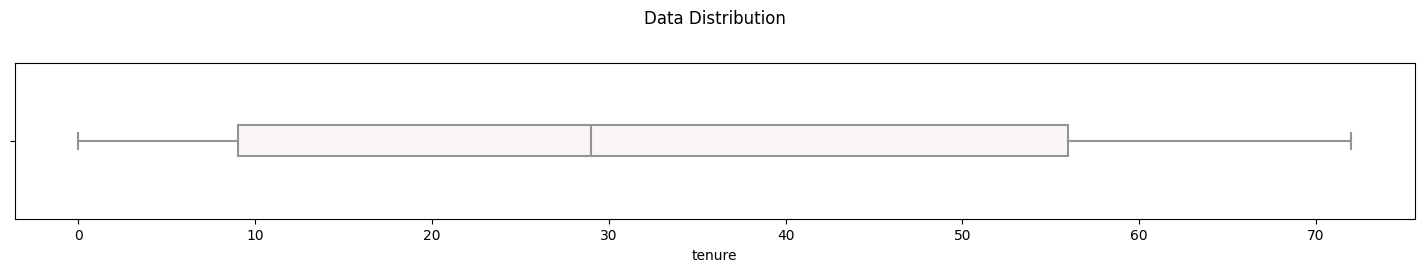

In [281]:
# Feature Tenure
fig, ax = plt.subplots(1, 1, figsize=(20, 2))
plt.title("Data Distribution", y=1.2)

sns.boxplot(x='tenure', data=data, width=.2, palette="vlag", ax=ax)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, wspace=0.1, hspace=0.4)
plt.show()

In [282]:
Q1 = data['tenure'].quantile(0.25)
Q3 = data['tenure'].quantile(0.75)
IQR = Q3 - Q1

n_outlier = data['tenure']>= (Q3 + 1.5*IQR)
data[n_outlier].shape

(0, 11)

* **Insight** : Tidak ada oulier untuk feature tenure
* **Handling** : -

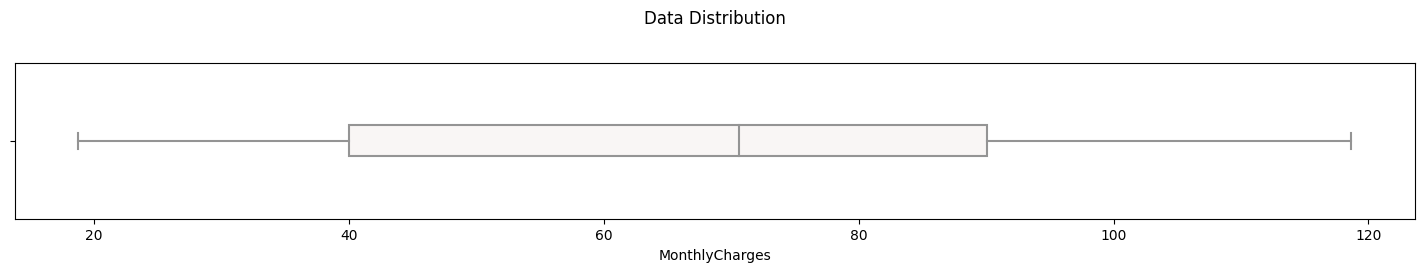

In [283]:
# Feature MonthlyCharges
fig, ax = plt.subplots(1, 1, figsize=(20, 2))
plt.title("Data Distribution", y=1.2)

sns.boxplot(x='MonthlyCharges', data=data, width=.2, palette="vlag", ax=ax)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, wspace=0.1, hspace=0.4)
plt.show()

In [284]:
Q1 = data['MonthlyCharges'].quantile(0.25)
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

n_outlier = data['MonthlyCharges']>= (Q3 + 1.5*IQR)
data[n_outlier].shape

(0, 11)

* **Insight** : Tidak ada oulier untuk feature MonthlyCharges
* **Handling** : -

#### **EDA**

##### **TARGET**

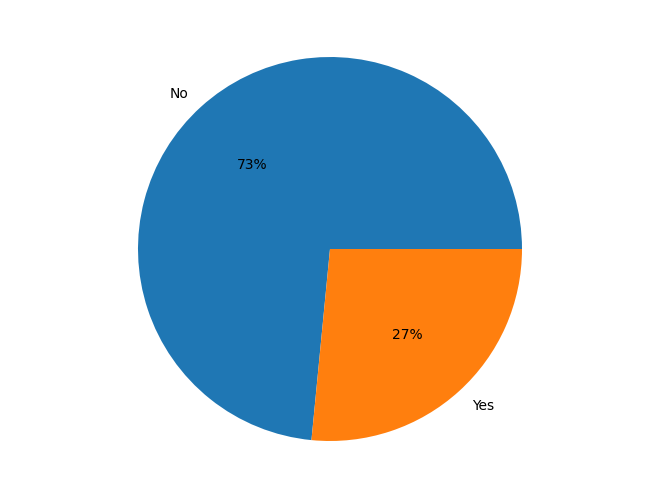

No     3565
Yes    1288
Name: Churn, dtype: int64

In [285]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = data.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()
churn

* **Insight** : Data tidak seimbang, jumlah data yang memiliki Churn: Yes lebih sedikit dibandingkan dengan Churn:No
* **Handling** : Akan dilakukan metode oversampling pada saat melkukan modelling

##### **FEATURES NUMERICAL**

Text(0.5, 1.0, '# of Customers by their tenure')

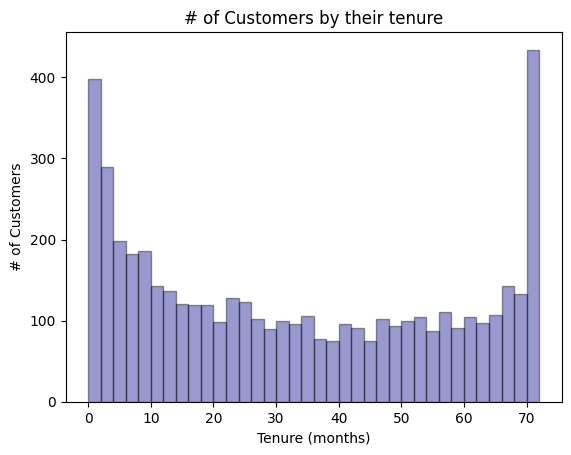

In [286]:
#Features Tenure
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

* **Insight** : Berdasarkan histogram tersebut, kita dapat melihat bahwa banyak pelanggan yang baru bergabung dengan perusahaan telekomunikasi selama satu bulan, sdan banyak juga yang sudah bergabung selama 72 bulan. Hal ini bisa jadi karena pelanggan yang berbeda memiliki kontrak yang berbeda. Jadi, berdasarkan kontrak yang mereka miliki, bisa jadi lebih/kurang mudah bagi pelanggan untuk tetap tinggal/meninggalkan perusahaan telekomunikasi. Di bawah ini kita akan memahami tenure berdasarkan jenis kontrak mereka.

Text(0.5, 1.0, 'Two Year Contract')

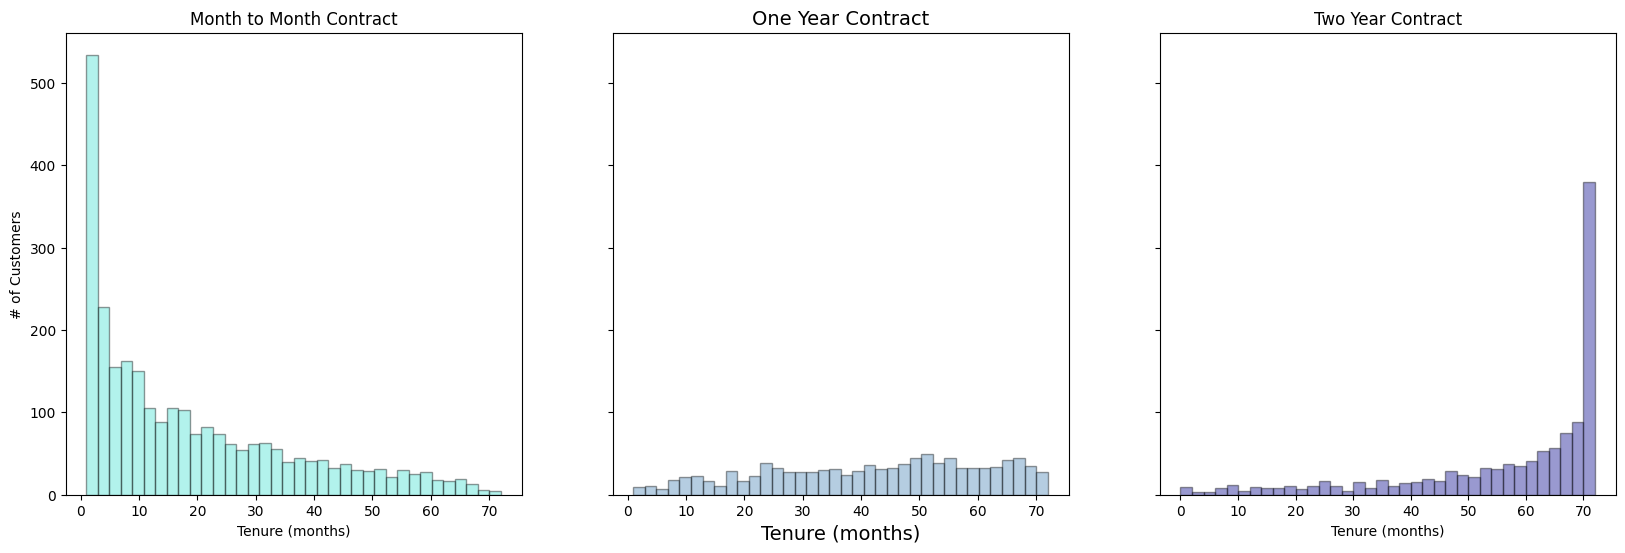

In [287]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Menariknya, sebagian besar kontrak bulanan berlangsung selama 1-2 bulan, sementara kontrak 2 tahun cenderung berlangsung selama sekitar 70 bulan. Hal ini menunjukkan bahwa pelanggan yang mengambil kontrak yang lebih lama lebih loyal kepada perusahaan dan cenderung bertahan untuk kembali berlangganan dalam jangka waktu yang lebih lama.

Text(0.5, 1.0, '# of Customers by their MonthlyCharges')

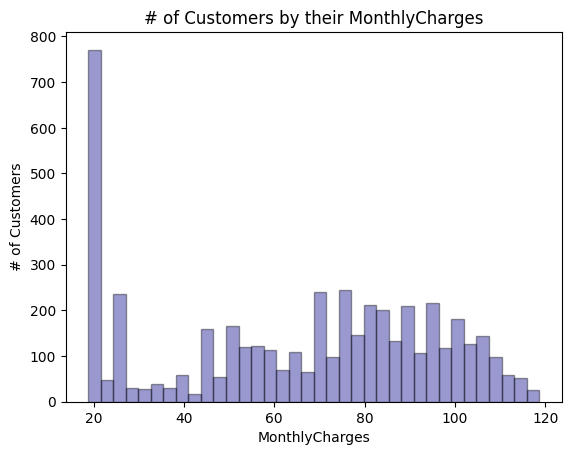

In [288]:
#Features MonthlyCharges
ax = sns.distplot(data['MonthlyCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('MonthlyCharges')
ax.set_title('# of Customers by their MonthlyCharges')

* **Insight** : Berdasarkan histogram tersebut, kita dapat melihat bahwa banyak pelanggan yang berlangganan yang memiliki biaya bulanan di rentang yang paling rendah yaitu sekitar 20 $.

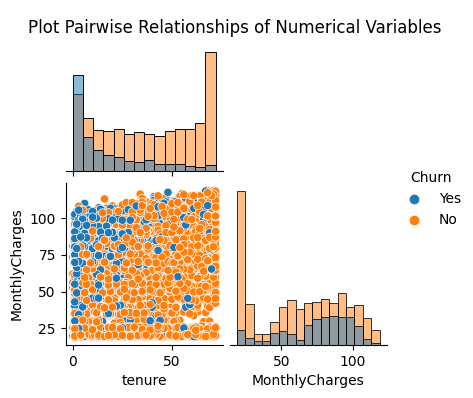

In [289]:
numerical = [var for var in data.columns if var not in ['ed']]

graph = sns.pairplot(data[numerical], height=2.0, corner=True, diag_kind='hist',hue='Churn')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.95)
plt.show()

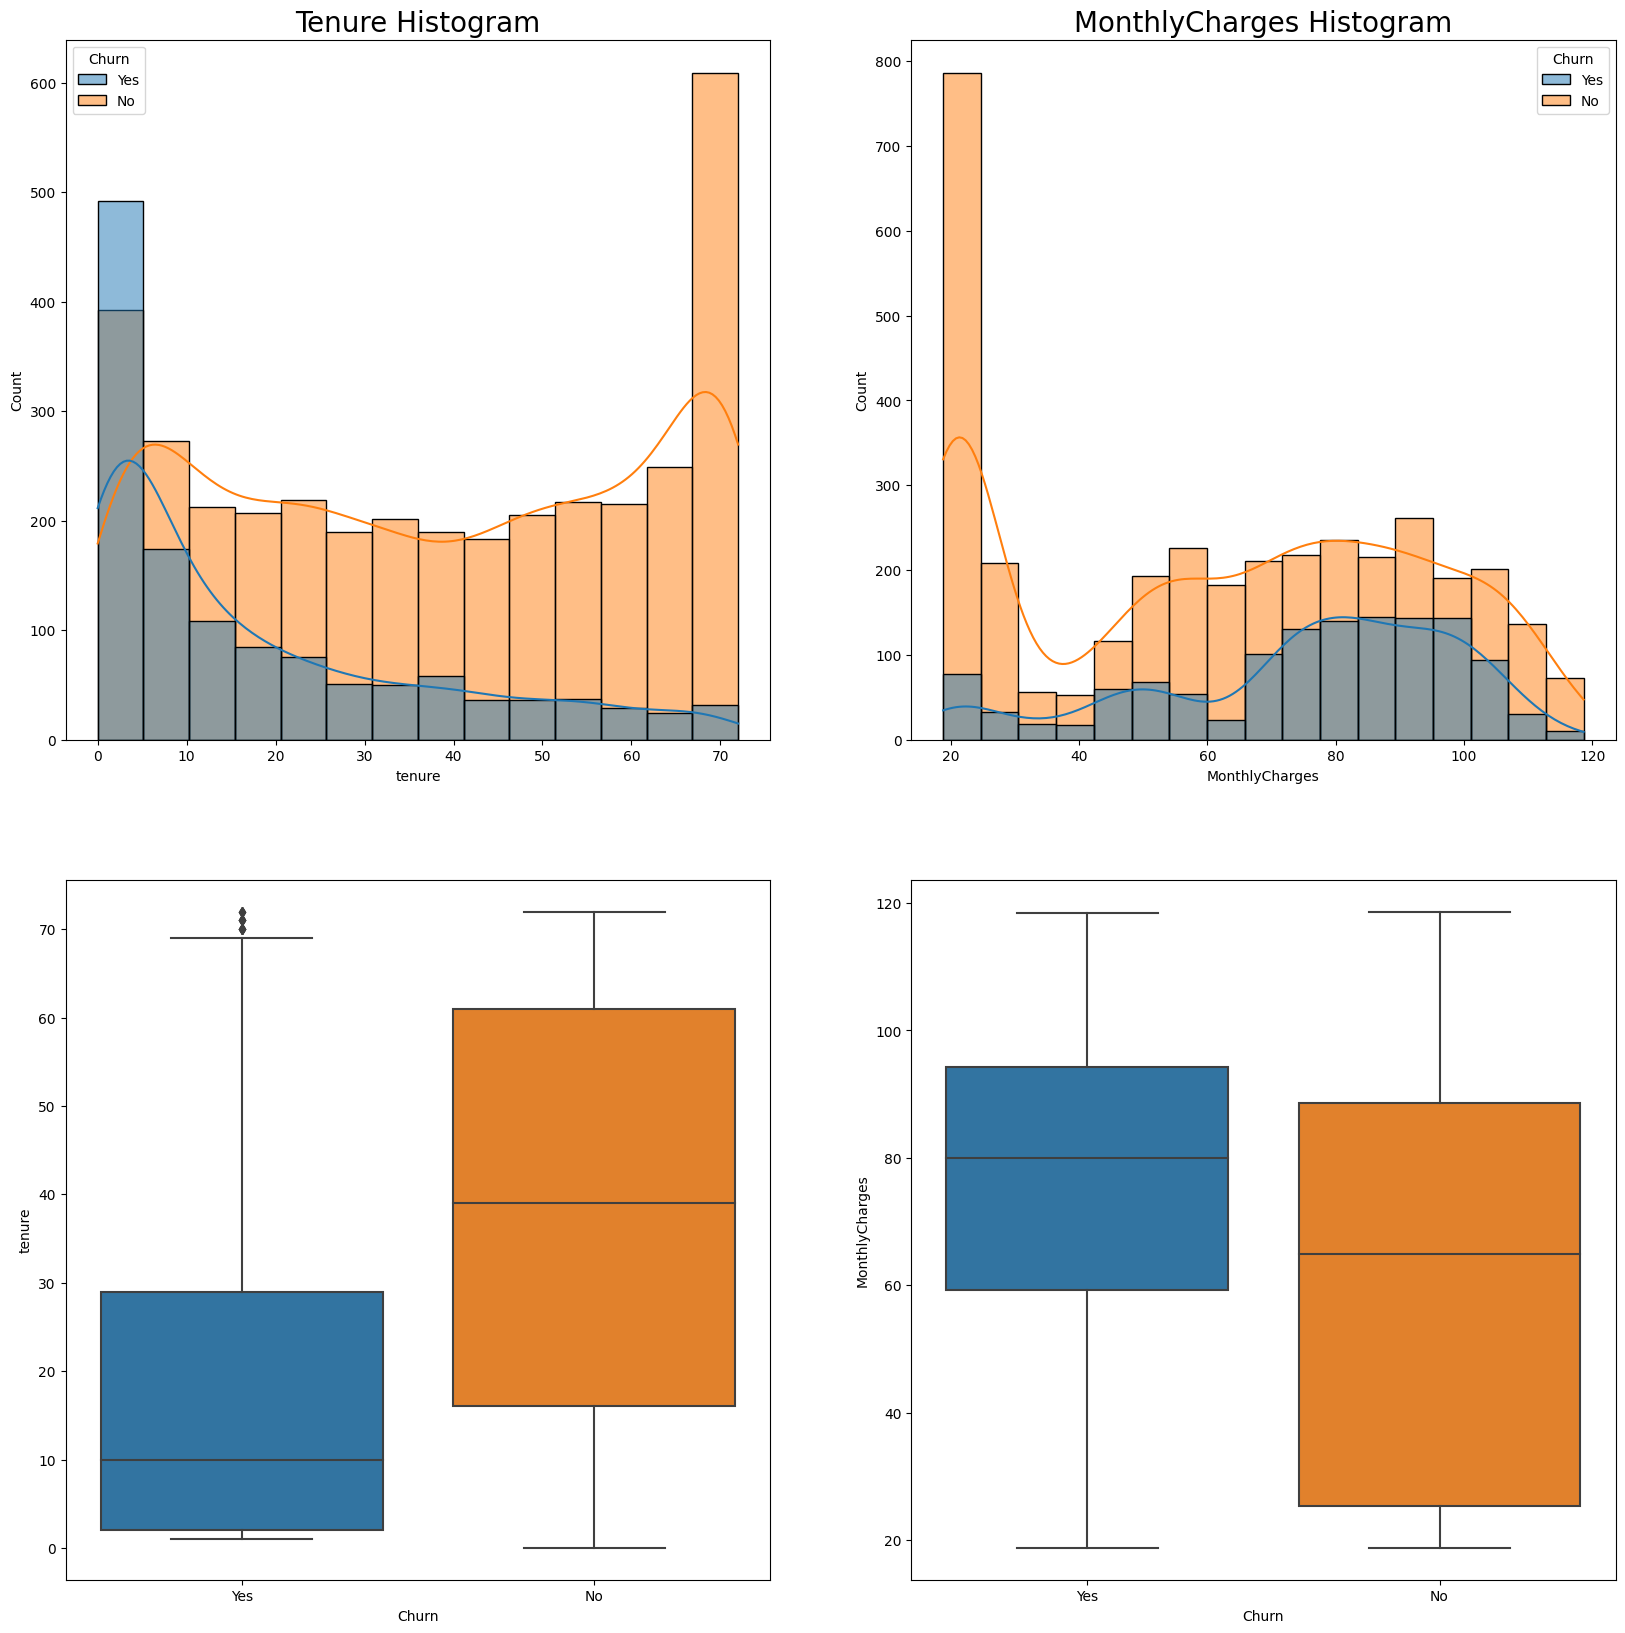

In [290]:
df=data.copy()
plt.figure(figsize=(20,20))

plt.subplot(221)
sns.histplot(data=df,x='tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('MonthlyCharges Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')
plt.show()

Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi `tenure` dari Churn yang No (kembali berlangganan) dan Churn yang Yes (berhenti berlangganan), 

perhatikan bahwa untuk setiap rentang tenure pada barplot pelanggan cenderung untuk kembali berlangganan kecuali saat rentang tenure yang bernilai sekitar 0-5 pelanggan cenderung untuk berhenti berlangganan


perhatikan juga bahwa saat `nilai tenure semakin rendah` (semakin lama customer berlangganan), `semakin besar kecenderungan pelanggan untuk berhenti berlangganan (peluang pelanggan berhenti berlangganan cenderung tinggi)`. Terdapat kemungkinan  `tenure` ini  mempengaruhi seorang pelanggan untuk kembali berlangganan atau tidak.


Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi `MonthlyCharges` dari Churn yang No (kembali berlangganan) dan Churn yang Yes (berhenti berlangganan), 

perhatikan bahwa untuk setiap rentang MonthlyCharges pada barplot pelanggan cenderung untuk kembali berlangganan 

perhatikan juga bahwa peluang tertinggi pelanggan untuk berhenti berlangganan saat `rentang bar MonthlyCharges berada di nilai sekitar  65 sampai 100`. Terdapat kemungkinan `MonthlyCharges` ini  mempengaruhi seorang pelanggan untuk kembali berlangganan atau tidak.

##### **FEATURES CATEGORICAL**

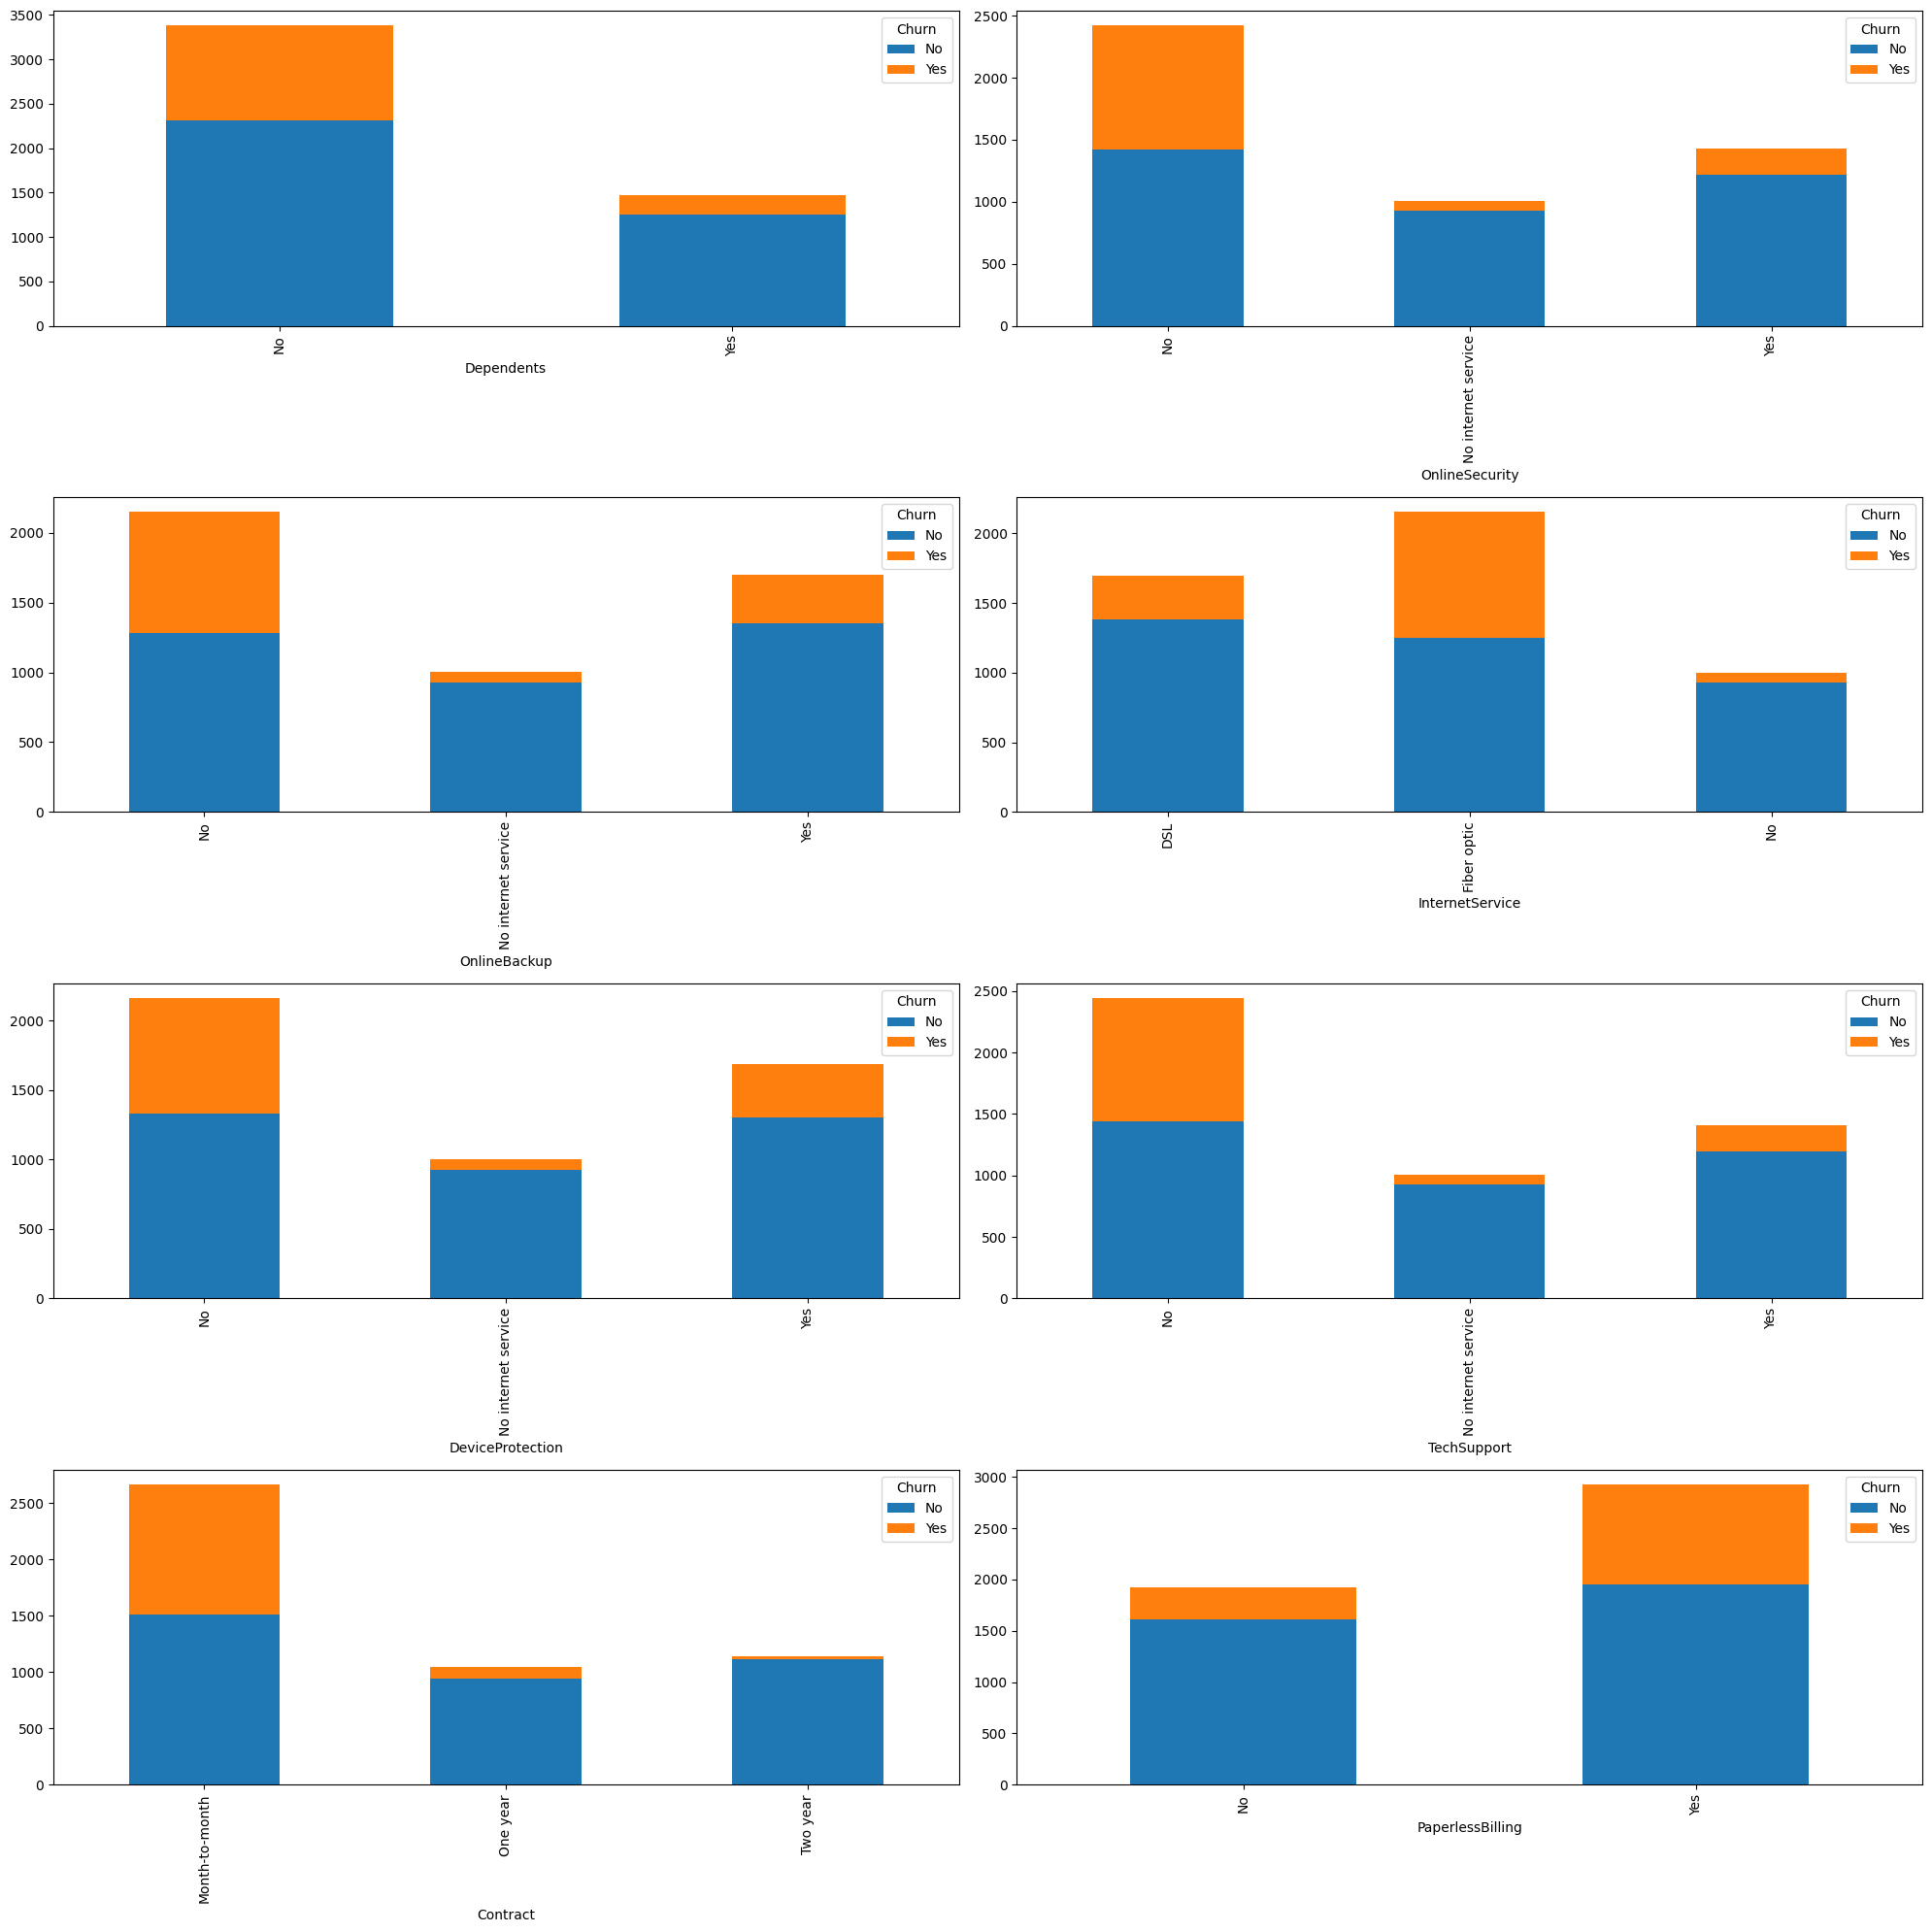

In [291]:
#BARPLOT BANYAKNYA PELANGGAN YANG MEMILIKI SUATU NILAI KATEGORIKAL TERHADAP CHURN
count = 0
fig = plt.figure(figsize=(10,20))

for i in data.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(data[i],data['Churn']).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

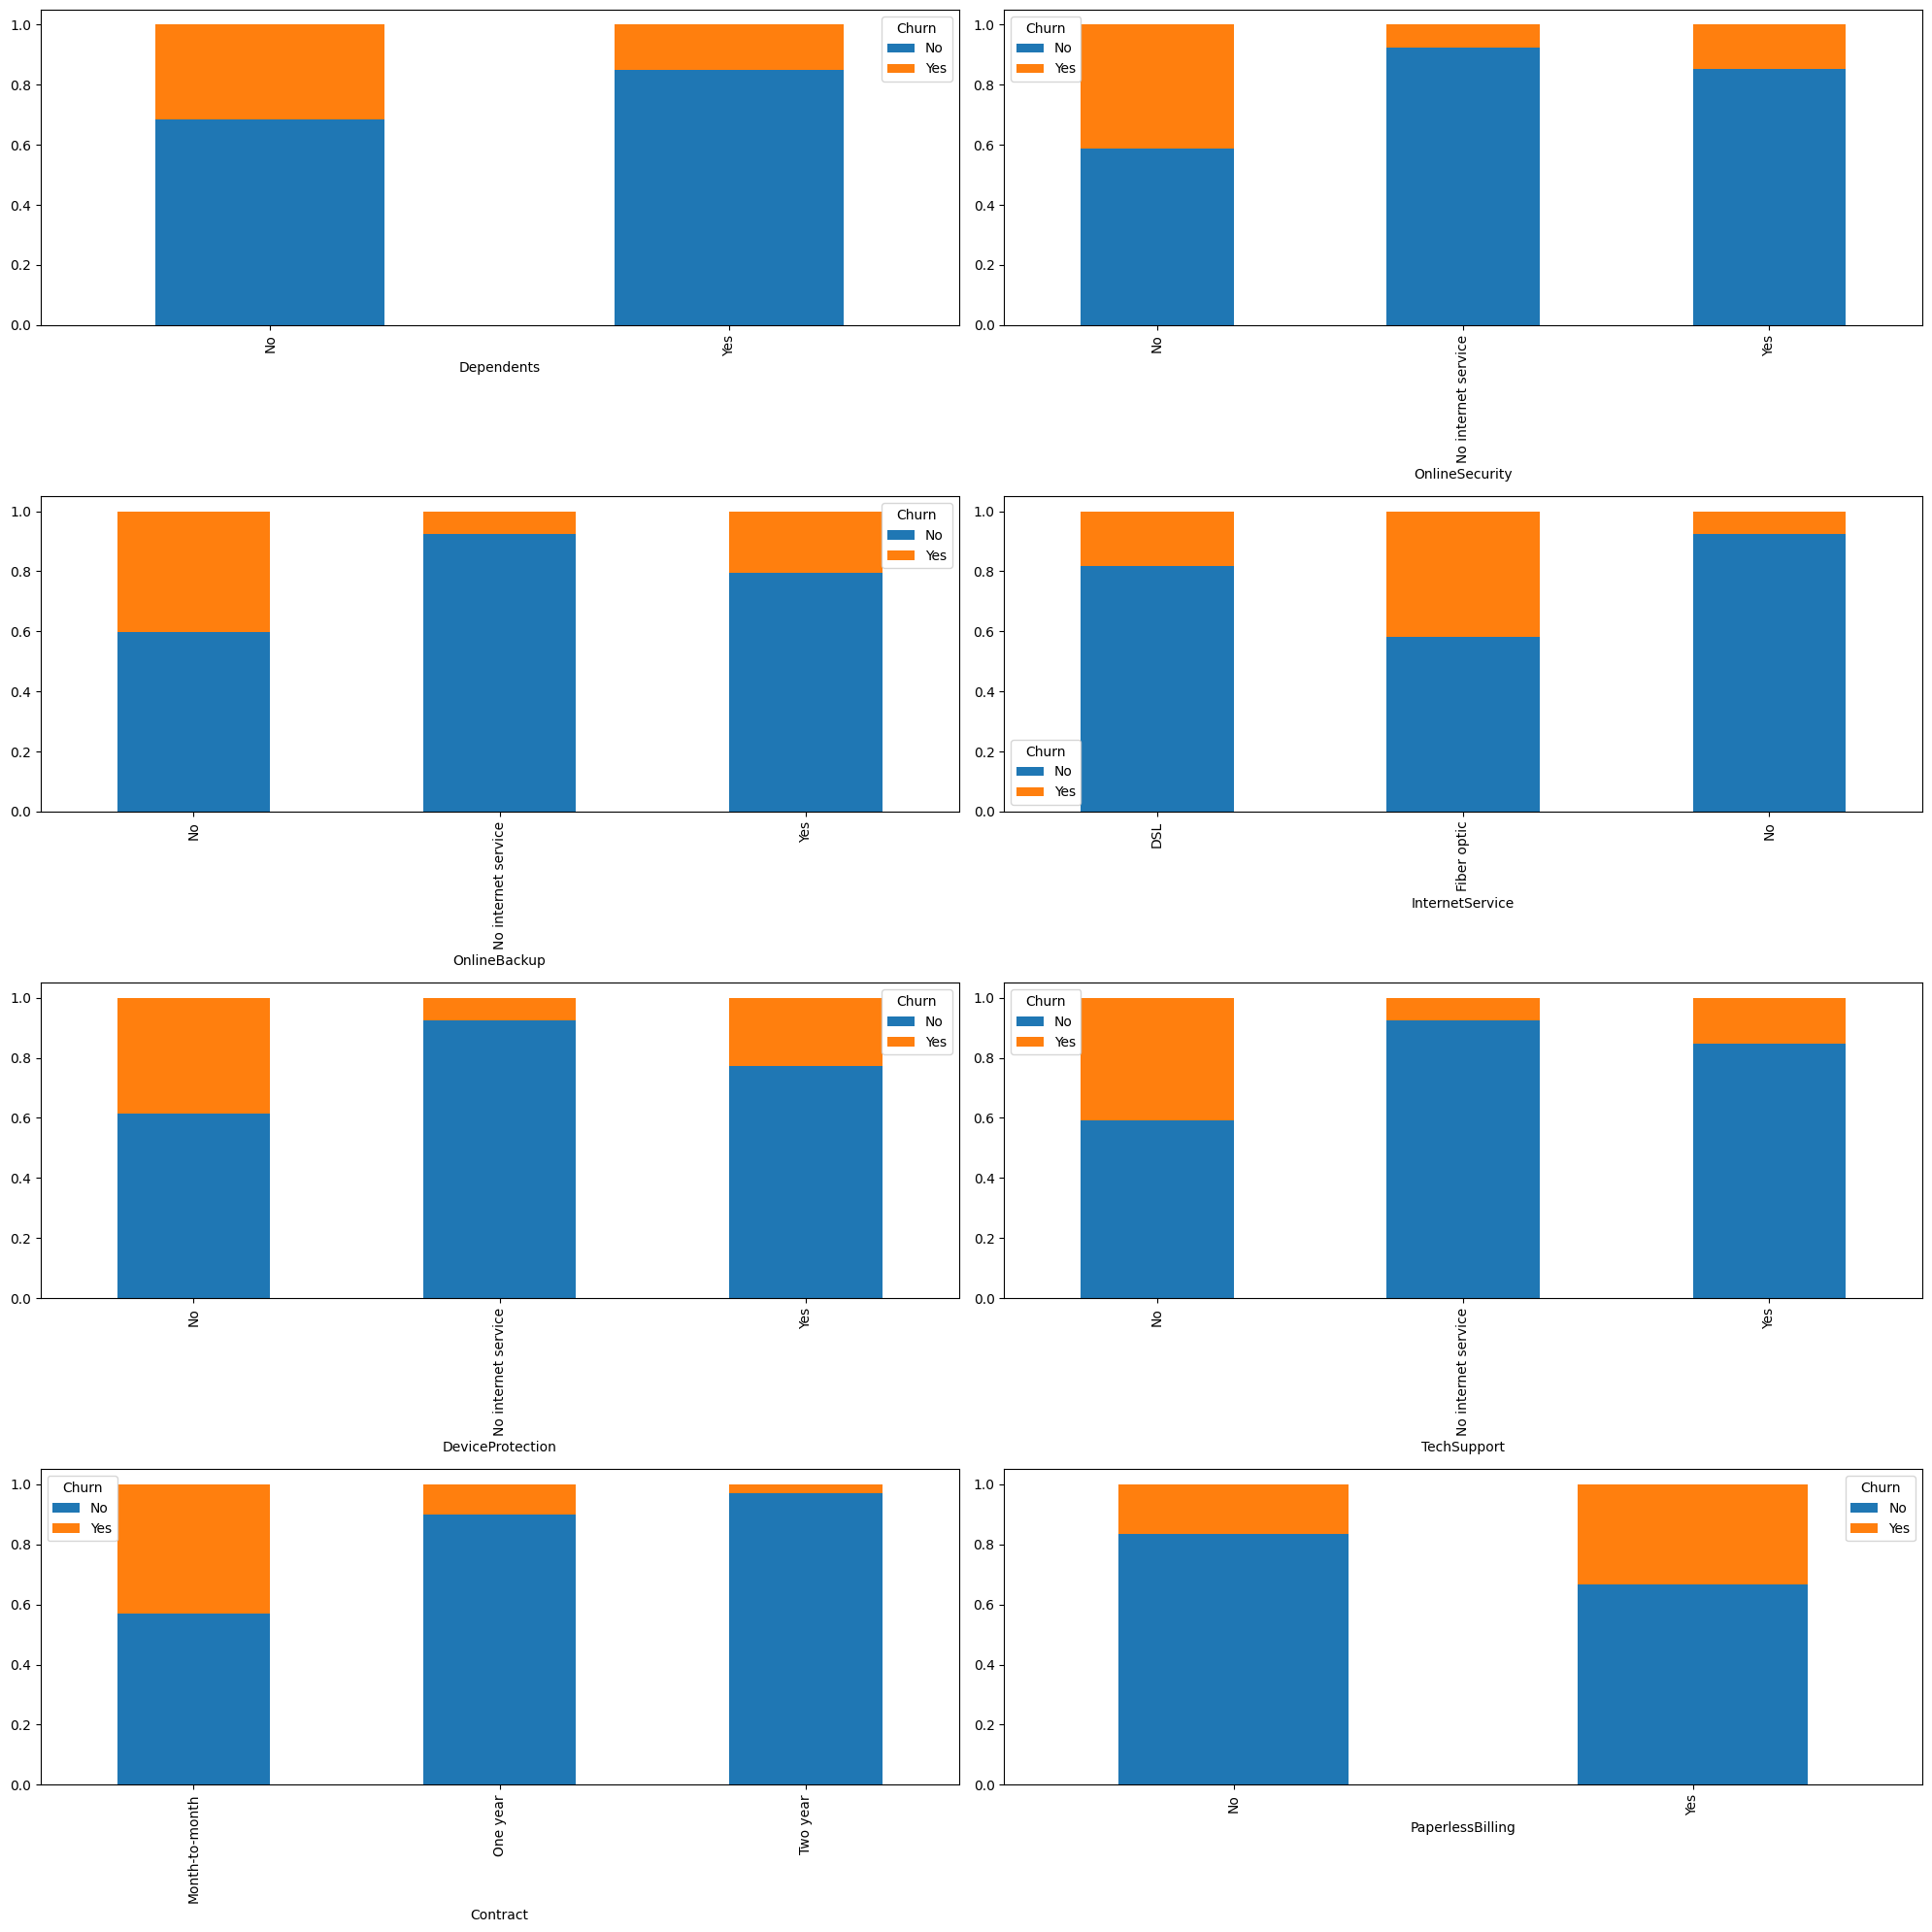

In [292]:
#BARPLOT PELUANG SUATU NILAI KATEGORIKAL TERHADAP CHURN
count = 0
fig = plt.figure(figsize=(20,20))

for i in data.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(data[i],data['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

Berdasarkan barplot dan tabel diatas kita dapat menyimpulkan beberapa hal :
1. Jumlah Pelanggan yang tidak memiliki tanggungan (`Dependents : No`) lebih banyak dibanding jenis lainnya, dan peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang tidak memiliki tanggungan (`Dependents : No`) `lebih besar` dibandingkan dengan pelanggan yang memiliki tanggungan. 
2. Jumlah Pelanggan yang  mendapatkan tagihan dalam bentuk kertas (`PaperlessBilling : Yes`) lebih banyak dibanding jenis lainnya, dan peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang mendapatkan tagihan dalam bentuk bukan kertas (`PaperlessBilling : Yes`) `lebih besar` dibandingkan dengan pelanggan yang tidak mendapatkan tagihan dalam bentuk bukan kertas. 
3. Jumlah Pelanggan yang  memiliki  kontrak jenis Month-to-month (`Contract : Month-to-month`) lebih banyak dibanding jenis lainnya, dan peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang  memiliki  Contract jenis Month-to-month (`Contract : Month-to-month`) `lebih besar` dibandingkan dengan pelanggan dengan jenis kontrak lainnya. 


4. Jumlah Pelanggan yang  menggunakan layanan InternetService  berupa Fiber optic (`InternetService: Fiber optic`) lebih banyak dibanding jenis lainnya, dan  peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang menggunakan layanan InternetService  berupa Fiber optic (`InternetService: Fiber optic`) `lebih besar` dibandingkan dengan pelanggan dengan jenis internet servis lainnya. 

5. Jumlah pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan OnlineSecurity (`OnlineSecurity: No`) lebih banyak dibanding jenis lainnya, dan  peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan OnlineSecurity (`OnlineSecurity: No`) `lebih besar` dibandingkan dengan pelanggan dengan jenis lainnya.
6. Jumlah pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan OnlineBackup  (`OnlineBackup: No`) lebih banyak dibanding jenis lainnya, dan  peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan OnlineBackup  (`OnlineBackup: No`) `lebih besar` dibandingkan dengan pelanggan dengan jenis lainnya.
7. Jumlah pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan Device Protection  (`Device Protection : No`) lebih banyak dibanding jenis lainnya, dan  peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan Device Protection  (`Device Protection : No`) `lebih besar` dibandingkan dengan pelanggan dengan jenis lainnya.
8. Jumlah pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan TechSupport  (`TechSupport: No`) lebih banyak dibanding jenis lainnya, dan  peluang pelanggan untuk tidak kembali berlangganan pada pelanggan yang menggunakan layanan InternetService  tapi tidak menggunakan layanan TechSupport  (`TechSupport: No`) `lebih besar` dibandingkan dengan pelanggan dengan jenis lainnya.

Perhatikan bahwa Kolom servis/layanan berupa OnlineSecurity, OnlineBackup, Device Protection, TechSupport, InternetService ini saling memiliki hubungan karena jika pelanggan tidak menggunakan layanan internet service maka pelanggan tidak bisa menggunakan layanan lainnya berupa OnlineSecurity, OnlineBackup, Device Protection, TechSupport. Artinya jika jumlah layanan yang digunakan pelanggan tidak ada atau 0, maka pelanggan tidak menggunakan layanan internet service, dan jika jumlah layanan yang digunakan pelanggan hanya 1, maka pelanggan hanya menggunakan layanan internet service saja, dan jika jumlah layanan yang digunakan pelanggan lebih dari 1 layanan ( maks 5 layanan), maka pelanggan menggunakan layanan internet service dan beberapa layanan lainnya.



In [293]:
service_column = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
# Samakan values No dan values layanan serta ubah tipe data
datas=data.copy()
for column in service_column:
  for j in range(len(datas)):
    if  datas[column][j] == 'No internet service':
      datas[column][j] = 'No'

for i in range(len(datas)):
  if datas['InternetService'][i] == 'DSL' or datas['InternetService'][i] == 'Fiber optic':
    datas['InternetService'][i] = 'Yes'

In [294]:
import distutils
from distutils.util import strtobool

for column in service_column:
  for j in range(len(datas)):
    datas[column][j] = strtobool(datas[column][j])

data['service_count'] = 0
for column in service_column:
  for j in range(len(datas)):
    data['service_count'][j] += datas[column][j]

In [295]:
data

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,service_count
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes,3
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No,3
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,4
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No,5
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4848,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No,3
4849,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No,3
4850,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No,0
4851,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes,1


In [296]:
for i in range(len(data)):
  if data['Churn'][i] == 'No':
    data['Churn'][i] = 0

for i in range(len(data)):
  if data['Churn'][i] == 'Yes':
    data['Churn'][i] = 1

data['Churn'] = data['Churn'].astype('int64')

In [297]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,n_unique,min,max,sample_unique
0,Dependents,object,2,No,Yes,"[Yes, No]"
1,tenure,int64,73,0,72,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 1..."
2,OnlineSecurity,object,3,No,Yes,"[No, Yes, No internet service]"
3,OnlineBackup,object,3,No,Yes,"[No, Yes, No internet service]"
4,InternetService,object,3,DSL,No,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,3,No,Yes,"[Yes, No internet service, No]"
6,TechSupport,object,3,No,Yes,"[Yes, No, No internet service]"
7,Contract,object,3,Month-to-month,Two year,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,No,Yes,"[Yes, No]"
9,MonthlyCharges,float64,1422,18.8,118.65,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, ..."


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.

Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Dependents` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `InternetService` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `OnlineSecurity` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `OnlineBackup` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `DeviceProtection` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `TechSupport` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `Paperlessbilling` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
8. Merubah fitur/kolom `Contract` menggunakan One Hot Encoding, karena fitur ini walaupun memiliki urutan/ordinal, tetapi karena lompatan jarak antara `Contract` itu kemungkinan value/besarnya tidak sama, maka akan lebih aman dan akurat bila kita menggunakan One Hot Encoding, dimana unique datanya juga hanya sedikit saja untuk fitur ini.

In [298]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup',
    'DeviceProtection','TechSupport','Contract','PaperlessBilling']),
    ], remainder='passthrough')

Bagi dataset menjadi df_seen dan df_unseen:
Idenya adalah ketika kita melakukan evaluasi terhadap model machine learning, kita ingin mendapatkan model yang dapat menggeneralisir serta akurat. Dalam melakukan generalisasi kita perlu membagi data menjadi 3 bagian, yaitu training set, validation set, dan test set. Dengan penjelasan sebagai berikut:

Dataset akan kita bagi menjadi df_seen dan df_unseen
df_seen yang kemudian akan kita bagi lagi menjadi X_train, X_val, y_train, y_val (untuk data training set dan data validasi set)
df_unseen yang akan menjadi data test set pada final model 

In [299]:
# Melakukan data splitting

# Membagi feature dan target
from sklearn.model_selection import train_test_split
feature=data.drop(columns=['Churn']).columns
target='Churn'

# Membagi dataset df_seen dan df_unseen dari dataset df
df_seen, df_unseen=train_test_split(data,
                                    stratify=data["Churn"].values, 
                                    test_size=0.2,random_state=2021)

# Membagi dataset train dan validation dari df_seen
X_train, X_val, y_train, y_val=train_test_split(df_seen[feature], df_seen[target], 
                                                stratify=df_seen["Churn"].values, 
                                                test_size=0.2, random_state=2021)

print(f"df_seen\nJumlah baris: {df_seen.shape[0]} baris\nJumlah kolom: {df_seen.shape[1]} kolom\n")
print(f"df_unseen\nJumlah baris: {df_unseen.shape[0]} baris\nJumlah kolom: {df_unseen.shape[1]} kolom\n")
print("=========================")
print(f"\nX_train\nJumlah baris: {X_train.shape[0]} baris\nJumlah kolom: {X_train.shape[1]} kolom\n")
print(f"X_val\nJumlah baris: {X_val.shape[0]} baris\nJumlah kolom: {X_val.shape[1]} kolom")

df_seen
Jumlah baris: 3882 baris
Jumlah kolom: 12 kolom

df_unseen
Jumlah baris: 971 baris
Jumlah kolom: 12 kolom


X_train
Jumlah baris: 3105 baris
Jumlah kolom: 11 kolom

X_val
Jumlah baris: 777 baris
Jumlah kolom: 11 kolom


In [300]:
testing = pd.DataFrame(transformer.fit_transform(df_seen),columns=transformer.get_feature_names_out())
testing.head()

,onehot__Dependents_No,onehot__Dependents_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_No,onehot__PaperlessBilling_Yes,remainder__tenure,remainder__MonthlyCharges,remainder__Churn,remainder__service_count
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,71.10,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,102.60,0.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,42.0,19.55,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,24.80,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,26.0,19.65,0.0,0.0


Metode klasifikasi yang akan kita coba sebagai penentuan model terbaik untuk dataset ini antara lain Logistic Regression, KNearest Neighbour Classifier, Decision Tree Classifier, Random Forest Classifier, Ada Boost Classifier, dan Gradient Boosting Classifier.

In [301]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

### Model Benchmarking : K-Fold

In [302]:
models = [logreg,knn,dt,rf,ada,gbc]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)
# Logistic Regression	0.837681	0.007663 #tanpa scaling
# Logistic Regression	0.837612	0.007696 #pake scaling

,mean roc_auc,sdev
model,,
Logistic Regression,0.837681,0.007663
Ada,0.836289,0.005024
Gradient Boosting,0.833106,0.006549
Random Forest,0.790697,0.013591
KNN,0.767963,0.018818
Decision Tree,0.662113,0.019862


In [303]:
models = [logreg,knn,dt,rf,ada,gbc]
score=[]
rata=[]
std=[]


for i in models:
    # smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        # ('resampling', smote_),
        ('models',i)])
    
    # Matriks Precision
    # model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring="precision")


    # Matriks Recall
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring="recall")
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

,mean recall,sdev
model,,
Gradient Boosting,0.535181,0.024047
Ada,0.535152,0.029790
Logistic Regression,0.525514,0.021542
KNN,0.525484,0.023440
Decision Tree,0.506090,0.027924
Random Forest,0.468522,0.036708


Berdasarkan nilai suatu performansi model yang dibangun menggunakan default hyperparameter. Nilai roc_auc tidak dapat dibandingkan nilainya (bias) karena dataset yang digunakan imbalanced. Dengan mempertimbangkan nilai recall positif yang tinggi serta variansi yang minimum, dan terbatas pada pemilihan model yang sudah dipelajari sehingga memberikan kemudahan dalam melakukan interpretasi model, maka Logistic Regression adalah model yang terbaik dibandingkan dengan model lainnya

### Model Benchmarking : Test Data

In [304]:
models = [logreg,knn,dt,rf,ada,gbc]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_val
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_val),X_val)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting']):
    estimator,y_pred,X_val = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_val)[:,1]
    score_roc_auc.append(roc_auc_score(y_val,y_predict_proba))
    print(j,'\n', classification_report(y_val,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada', 'Gradient Boosting'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       571
           1       0.62      0.54      0.58       206

    accuracy                           0.79       777
   macro avg       0.73      0.71      0.72       777
weighted avg       0.78      0.79      0.79       777

KNN 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       571
           1       0.60      0.50      0.54       206

    accuracy                           0.78       777
   macro avg       0.71      0.69      0.70       777
weighted avg       0.77      0.78      0.77       777

Decision Tree 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       571
           1       0.53      0.56      0.54       206

    accuracy                           0.75       777
   macro avg       0.68      0.69      0.69       777
weighted avg       0.76      0

,roc_auc score
model,
Ada,0.853519
Gradient Boosting,0.850373
Logistic Regression,0.843776
Random Forest,0.811028
KNN,0.777596
Decision Tree,0.691029


Dengan pertimbangkan beberapa hal seperti saat Brencmarking model, perhatikan bahwa model Logistic Regression masih yang terbaik performanya jika diliat dari nilai recall positif pada test data. Sehingga model yang dibangun akan difokuskan pada model Logistic Regression. 

Sebelum melakukan tuning model, perlu diperhatikan bahwa dataset yang digunakan tidak seimbang (Imbalanced Data) oleh karena itu akan dilakukan Resampling dataset menggunakan oversampling untuk membangun suatu model Logistic Regression, lalu kita akan bandingkan performasi modelnya apakah lebih baik setelah dilakukan oversampling atau tidak.

Alasan uji menggunakan random oversampling yakni dengan asumsi perusahaan ingin menambah informasi data kelas positif (minoritas) sehingga dapat melihat lebih banyak pola data kelas positif. 

### Test Oversampling with K-Fold Cross Validation

In [305]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [306]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [307]:
data = X_train
target = y_train

In [308]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_t, X_v = data.iloc[train_index], data.iloc[val_index]
    Y_t, Y_v = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_t, Y_t)

    # instantiate model
    logreg =  LogisticRegression()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',logreg)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_t, Y_t, X_v, Y_v, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_v, Y_v, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [309]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.799213,0.765273,0.842349,0.823082,0.726998,0.677867,0.537112,0.457831,0.646104,0.575758
1,0.797781,0.797428,0.840073,0.843162,0.722819,0.729322,0.523617,0.554217,0.646667,0.638889
2,0.795634,0.778135,0.843132,0.814838,0.721573,0.695518,0.527665,0.481928,0.638889,0.606061
3,0.794202,0.819936,0.838830,0.856109,0.719340,0.756215,0.523617,0.578313,0.636066,0.695652
4,0.796707,0.790997,0.843968,0.805464,0.724554,0.710491,0.536388,0.500000,0.639871,0.630769
5,0.795707,0.800000,0.837655,0.865800,0.719907,0.727376,0.518868,0.536585,0.642738,0.647059
6,0.796422,0.787097,0.842334,0.823251,0.723689,0.698568,0.533693,0.463415,0.639742,0.633333
7,0.793560,0.819355,0.835585,0.883772,0.716384,0.764130,0.512129,0.634146,0.638655,0.666667
8,0.796064,0.787097,0.841067,0.835954,0.721952,0.707112,0.526954,0.500000,0.640984,0.621212
9,0.795707,0.780645,0.842737,0.817448,0.722163,0.703666,0.529650,0.512195,0.639024,0.600000


#### Evaluation Metrics With Oversampling

In [310]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.759133,0.717042,0.839617,0.823927,0.758944,0.689254,0.787141,0.783133,0.745387,0.481481
1,0.758402,0.762058,0.838250,0.840890,0.757987,0.731446,0.799805,0.795181,0.738641,0.536585
2,0.772284,0.726688,0.846306,0.813993,0.771889,0.690764,0.813931,0.722892,0.751349,0.491803
3,0.762543,0.758842,0.842092,0.855897,0.762212,0.731034,0.799805,0.819277,0.744334,0.531250
4,0.768031,0.742765,0.847922,0.810789,0.767812,0.708228,0.798733,0.756098,0.752525,0.508197
5,0.754506,0.780645,0.830084,0.862805,0.754142,0.754014,0.792986,0.853659,0.736318,0.555556
6,0.762299,0.738710,0.840946,0.823946,0.762075,0.710351,0.792986,0.804878,0.747132,0.503817
7,0.762056,0.767742,0.837982,0.883879,0.761798,0.741953,0.794934,0.853659,0.745887,0.538462
8,0.766439,0.758065,0.843689,0.838629,0.766123,0.729333,0.803215,0.817073,0.748185,0.527559
9,0.774233,0.703226,0.845676,0.818036,0.773894,0.673176,0.812957,0.756098,0.754521,0.462687




Terlihat bahwa hasil evaluation metricsnya untuk recall positive lebih baik setelah di oversampling dibandingkan tidak di oversampling tetapi precision positive menjadi turun. Hal ini dikarenakan setelah menggunakan data yang balanced (setelah dilakukan oversampling), ternyata memang dari segi nilai roc_auc untuk model logistic regression tinggi sehingga menyebabkan nilai true positive ratenya (Recall positif) juga tinggi. Dan memang seharusnya dari metric evaluation yang ingin kita perhatikan, kita menginginkan model yang memiliki Recall positifnya tinggi sehingga salah satu caranya memang dengan melakukan oversampling terhadap dataset yang kita punya. Selain itu dataset yang sudah kita oversampling akan cenderung meningkatkan true positif, karena adanya penambahan data duplikat dari kelas minoritas (kelas positif) dapat mengenali lebih baik pola data kelas positif, hal ini sejalan dengan metric evaluation yang ingin kita perhatikan yaitu memaksimalkan true positif.



#### Classification Reports Without Oversampling

In [311]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       228
           1       0.58      0.46      0.51        83

    accuracy                           0.77       311
   macro avg       0.70      0.67      0.68       311
weighted avg       0.75      0.77      0.76       311

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       228
           1       0.64      0.55      0.59        83

    accuracy                           0.80       311
   macro avg       0.74      0.72      0.73       311
weighted avg       0.79      0.80      0.79       311

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       228
           1       0.61      0.48      0.54        83

    accuracy                           0.78       311
   macro avg       0.72      0.68      0.70       311
weighted avg       0.77      0.78      0.77       311

              preci

#### Classification Reports With Oversampling

In [312]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       228
           1       0.48      0.78      0.60        83

    accuracy                           0.72       311
   macro avg       0.69      0.74      0.69       311
weighted avg       0.79      0.72      0.73       311

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       228
           1       0.54      0.80      0.64        83

    accuracy                           0.76       311
   macro avg       0.72      0.77      0.73       311
weighted avg       0.81      0.76      0.77       311

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       228
           1       0.49      0.72      0.59        83

    accuracy                           0.73       311
   macro avg       0.69      0.73      0.69       311
weighted avg       0.78      0.73      0.74       311

              preci

### Hyperparameter Tuning

Hyperparameter tuning penting untuk mengontrol perilaku keseluruhan model machine learning. Akan dilakukan hyperparameter tuning pada model Logistic Regression, dengan harapan model lebih optimal dengan melihat nilai roc_aucnya.

In [313]:
logreg = LogisticRegression()
ros = RandomOverSampler(random_state=42)
# Settings pipeline
Pipe_lr=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',logreg)
])


skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

hyperparam_lr = [    
    {'model__penalty' : ['l2'],
    'model__C' : np.logspace(-10, 10, 20),
    'model__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'model__max_iter' : [100, 1000,2500, 5000]
    }
]

lr_grid = GridSearchCV(estimator = Pipe_lr,
                       n_jobs=-1,
                      param_grid = hyperparam_lr, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      )

In [314]:
lr_grid.fit(X_train,y_train)        

print('\n\nLogistic Regression Hyperparameter')
print(lr_grid.best_score_)
print(lr_grid.best_params_)



Logistic Regression Hyperparameter
0.8369894116718344
{'model__C': 4832.930238571752, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


Selanjutnya kita akan melakukan cross validate dan membandingkan hasil sebelum tuned (*default), dengan hasil tuned*. Validasi silang adalah teknik evaluasi yang berguna untuk mengukur kinerja model secara lebih akurat daripada hanya membagi dataset menjadi satu set pelatihan dan satu set pengujian

In [315]:
Pipe_lr=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',logreg)
])
Pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model', LogisticRegression())])

In [316]:
X_trainSeen = df_seen.drop(columns='Churn')
y_trainSeen = df_seen['Churn']

In [317]:
#cross validate hasil sesudah tuned
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    lr_grid,
    X_trainSeen,
    y_trainSeen,
    cv=3,
    scoring=['roc_auc'],
    return_train_score=True,
    verbose=False
 )

cv_results

{'fit_time': array([108.48763967,  89.90807486,  93.71485162]),
 'score_time': array([0.00830793, 0.0078423 , 0.00829458]),
 'test_roc_auc': array([0.82855263, 0.83799622, 0.85016539]),
 'train_roc_auc': array([0.84681347, 0.84335832, 0.8351247 ])}

In [320]:
# cross validate hasil sebelum tuned (default)
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    Pipe_lr,
    X_trainSeen,
    y_trainSeen,
    cv=3,
    scoring=['roc_auc'],
    return_train_score=True,
    verbose=False
 )

cv_results

{'fit_time': array([0.08012342, 0.0720768 , 0.08007622]),
 'score_time': array([0.00800133, 0.00800061, 0.        ]),
 'test_roc_auc': array([0.8279743 , 0.83791038, 0.85140699]),
 'train_roc_auc': array([0.84683569, 0.84324193, 0.83583144])}

Berdasarkan hasil cross validasi diatas, model setelah dan sebelum di tuned cenderung memberikan performa yang kurang lebih sama, tetapi dalam hal ini kita akan pilih model yang sebelum dituned.

Final Model

Pertama kita akan bagi df_unseen menjadi X_test dan y_test

In [321]:
X_test = df_unseen.drop(columns='Churn')
y_test = df_unseen['Churn']

Setelah itu kita akan membandingkan model *Default* dan model *Tuned*

In [322]:
# Model LR Default
Pipe_lr=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',logreg)
])
Pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('model', LogisticRegression())])

In [323]:
# Model LRTuned
best_model = lr_grid.best_estimator_




In [324]:
# Melihat perbandingan model dengan default dan hyperparameter tuning

# Default
y_pred_default = Pipe_lr.predict(X_test)
y_pred_proba_default = Pipe_lr.predict_proba(X_test)

# Tuned
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC_AUC Score Default LR : ', roc_auc_default)
print('ROC_AUC Score Tuned LR : ', roc_auc_tuned)

ROC_AUC Score Default LR :  0.8465757743783772
ROC_AUC Score Tuned LR :  0.8462332974547984


Nilai ROC_AUC yang diperoleh model sebelum dituning lebih baik dibandingkan setelah dituning, sehingga final model yang digunakan yaitu model logistic regression sebelum dituning.



In [337]:
report = classification_report(y_test, y_pred_default)
print(report)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_default).ravel()
print(f"True Negatif: {tn}, False Positif: {fp}, False Negatif: {fn}, True Positif: {tp}")

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       713
           1       0.53      0.81      0.64       258

    accuracy                           0.75       971
   macro avg       0.72      0.77      0.73       971
weighted avg       0.81      0.75      0.77       971

True Negatif: 525, False Positif: 188, False Negatif: 50, True Positif: 208


Perhatikan bahwa semakin tinggi nilai roc_auc akan menyebabkan nilai True Positif Rate (Recall positif) semakin tinggi sekaligus menurunkan nilai False Positive Rate (FPR).


In [327]:
Pipe_lr['model'].intercept_

array([-0.21469211])

In [328]:
#Koefisien-koefisien pada persamaan logistic regression
Aa=Pipe_lr['model'].coef_
Aa

array([[-0.00408419, -0.20585829, -0.14620317,  0.11805634, -0.18179564,
         0.1461491 , -0.18179564, -0.17429594,  0.08139467, -0.18179564,
        -0.10954151, -0.16144635, -0.18179564,  0.13329951,  0.03619476,
        -0.18179564, -0.0643416 ,  0.67027586, -0.05490207, -0.82531627,
        -0.34514507,  0.13520259, -0.03103663,  0.01940599, -0.24302637]])

In [329]:
#nilai odd ratio
odds_ratios = np.exp(Aa)
odds_ratios

array([[0.99592414, 0.81394841, 0.86398215, 1.1253075 , 0.83377171,
        1.15736874, 0.83377171, 0.84004826, 1.08479895, 0.83377171,
        0.89624496, 0.85091218, 0.83377171, 1.14259216, 1.03685776,
        0.83377171, 0.93768463, 1.95477649, 0.94657784, 0.43809641,
        0.70811762, 1.14476868, 0.96944006, 1.01959551, 0.78425083]])

**Cara Kerja Algoritma Final Model**

Berikut Persamaan Final Model Logistic Regression:

$$ P(y=1) = \frac{1}{1+exp(-0.214 - 0.004x_1 + -0.206x_2 -0.146x_3 -  0.118x_4 - 0.181x_5 + 0.146x_6 + -0.181x_7 - 0.174x_8 + 0.081x_9 -0.181x_10  -0.109x_11 -0.161x_12  -0.181x_13 + 0.133x_14 + 0.036x_15 -0.181x_16 -0.064x_17 + 0.670x_18 -0.054x_19 -0.825x_20 -0.345x_21 + 0.135x_22 -0.031x_23 + 0.019x_24 -0.243x_25)} $$ 

P(y=1) = 1/{1+exp(-0.214 - 0.004x_1 + -0.206x_2 -0.146x_3 -  0.118x_4 - 0.181x_5 + 0.146x_6 + -0.181x_7 - 0.174x_8 + 0.081x_9 -0.181x_10  -0.109x_11 -0.161x_12  -0.181x_13 + 0.133x_14 + 0.036x_15 -0.181x_16 -0.064x_17 + 0.670x_18 -0.054x_19 -0.825x_20 -0.345x_21 + 0.135x_22 -0.031x_23 + 0.019x_24 -0.243x_25)}

Keterangan: 

x_1:Dependents_No

x_2:Dependents_Yes

x_3: OnlineSecurity_No'

x_4:OnlineSecurity_No internet service'

x_5:OnlineSecurity_Yes

x_6:OnlineBackup_No

x_7:OnlineBackup_No internet service',

x_8:OnlineBackup_Yes',

x_9:InternetService_DSL',

x_10 :InternetService_Fiber optic',

x_11: InternetService_No','

x_12:DeviceProtection_No',

x_13:'DeviceProtection_No internet service'

x_14:DeviceProtection_Yes', 

x_15:TechSupport_No',

x_16:TechSupport_No internet service','

x_17:TechSupport_Yes','

x_18 :Contract_Month-to-month',

x_19:Contract_One year','

x_20 :Contract_Two year','

x_21:PaperlessBilling_No',

x_22:PaperlessBilling_Yes',

x_23:tenure','

x_24:MonthlyCharges',

x_25:service_count'

Cara kerja final model tersebut dilakukan dengan memasukkan nilai-nilai semua fitur yang digunakan untuk membangun model, perlu diperhatikan bahwa untuk variabel kategorikal akan memberi inputan 1 atau 0 setelah dilakukan encoding, kemudian hasil nilai model akan memberikan rentang 1 dan 0 yaitu mencerminkan nilai peluang pelanggan akan berhenti berlangganan (Churn).


**Model Intepretation**

Untuk intepretasi model, kami membandingkan apa yang terjadi ketika kami meningkatkan salah satu nilai fitur sebesar 1 satuan. Namun, alih-alih melihat perbedaannya, kami melihat rasio dari dua prediksi:

$$\frac{odds_{x_j + 1}}{odds_{x_j}} = exp({\beta_j}(x_j + 1) - {\beta_j}x_j) = exp({\beta_j})$$

Berikut ini adalah interpretasi untuk model regresi logistik dengan jenis fitur yang berbeda:

* Ketika semua fitur numerik bernilai nol dan fitur kategorikal berada pada kategori referensi, perkiraan kenaikan peluang adalah $exp(β)$.
* Jika meningkatkan nilai fitur $x_j$ sebesar satu unit, perkiraan peluang berubah adalah $exp(β_j)$




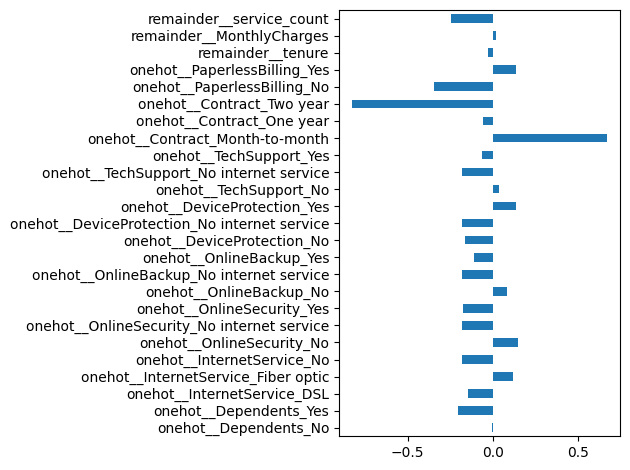

In [330]:
log_reg_input_features = Pipe_lr[:-1].get_feature_names_out()

pd.Series(Pipe_lr[-1].coef_.ravel(), index=log_reg_input_features).plot(kind='barh')
plt.tight_layout()

Berikut interpretasi model untuk 5 fitur yang cenderung memiliki pengaruh besar terhadap Churn jika fitur lainnya dibuat sama:

1. onehot_Paperlessbilling_No: setiap perubahan yg awalnya Paperlessbilling bernilai no menjadi Paperlessbilling yes akan menurunkan peluang customer untuk churn sebesar 0.708 kali .

2. onehot_Dependents_Yes:setiap perubahan yg awalnya dependents bernilai yes menjadi dependent bernilai no akan menurunkan peluang customer untuk churn sebesar 0.814 kali .

3. Service_count: setiap ada pertambahan 1 tingkatan/level pada fitur service count akan menurunkan  peluang customer untuk churn sebesar 0,784 kali

4. onehot_contract_two_year:setiap perubahan yang awalnya kontrak selama 2 tahun menjadi selain 2 tahun akan menurunkan peluang customer untuk churn sebesar 0.438 kali .

5. onehot_contract_month-to-month: setiap perubahan yang awalnya kontrak bulanan menjadi selain bulanan akan menaikkan peluang customer untuk churn sebesar 1.954 kali .

**Limitasi Model**

Model yang dibangun akan memberikan hasil prediksi akurat ketika nilai tenurnya tidak sama dengan 0, karena ketika tenurenya bernilai 0, model belum tentu memberikan hasil no churn, padahal untuk setiap tenure yang bernilai 0 , artinya pelanggan tersebut baru berlangganan sehingga tidak perlu dilakukan prediksi karena hasil aktualnya selalu memberikan pelanggan tersebut kembali berlangganan (Churn:No)

### **`Conclusion`**



In [336]:
report = classification_report(y_test, y_pred_default)
print(report)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_default).ravel()
print(f"True Negatif: {tn}, False Positif: {fp}, False Negatif: {fn}, True Positif: {tp}")

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       713
           1       0.53      0.81      0.64       258

    accuracy                           0.75       971
   macro avg       0.72      0.77      0.73       971
weighted avg       0.81      0.75      0.77       971

True Negatif: 525, False Positif: 188, False Negatif: 50, True Positif: 208


Beberapa hal yang dapat disimpulkan yaitu:

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model CatBoosting yang sudah dibuat, model dapat mengetahui 53% pelanggan yang ***churn*** dan 91% pelanggan yang ***tidak churn*** berdasarkan ***precision***. Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 81%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar %. 
  
Bila seandainya biaya mempertahankan pelanggan 10$ dan biaya mendapatkan pelanggan baru 50$, dan terdapat 4853 pelanggan dimana pelanggan yang churn 1288 orang dan yang tidak churn 3565 orang, maka kurang lebih perhitungannya adalah sebagai berikut:

  
*Tanpa Model* (Perusahaan mengeluarkan biaya akuisisi pelanggan ke semua pelanggan yang ***churn***):
- Total pelanggan ***churn* yang `ditemukan`** => 1288 orang
- Total pelanggan ***churn* yang `tidak ditemukan`** => 0 orang
- Biaya akuisisi pelanggan => 50 USD 
- Biaya yang terbuang => 1288 x 50 = 64400 USD

*Dengan Model* (Perusahaan mengeluarkan biaya akuisisi pelanggan ke semua pelanggan yang ***churn*** `sesuai prediksi`):
- Total pelanggan ***churn*** yang ***`benar churn`*** => (1288 x 0.81)= 1044 orang
- Biaya akuisisi pelanggan => 1044 x 50 = 52200 USD
- Jumlah penghematan => ((64400-52200)/64400)*100% = 18,9% 

Dengan adanya bantuan model, perusahan e-commerce dapat menghemat biaya yang cukup besar dengan melakukan pemasaran yang lebih tepat sasaran

Beberapa hal yang dapat disimpulkan yaitu:

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model CatBoosting yang sudah dibuat, model dapat mengetahui 82% pelanggan yang *churn* dan 94% pelanggan yang *tidak churn* berdasarkan *precision*. Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 74%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar 4%.

Bila seandainya biaya mempertahankan pelanggan 10
, dan terdapat 3264 pelanggan dimana pelanggan yang churn 533 orang dan yang tidak churn 2731 orang, maka kurang lebih perhitungannya adalah sebagai berikut:

Tanpa Model (Semua pelanggan diberikan penawaran):

Total Biaya => 3264 * 10 = 32.640 USD
Total pelanggan churn yang ditemukan => 533 orang
Total pelanggan churn yang tidak ditemukan => 0 orang
Total pelanggan tidak churn yang ditemukan => 2731 orang
Total pelanggan tidak churn yang tidak ditemukan => 0 orang
Biaya yang terbuang => 2731 x 10 = 27.310 USD

### **`Recommendations`**

Adapun beberapa rekomendasi yang dapat diberikan terkait :  
  
    - Memberikan penawaran pada pelanggan dengan jenis kontrak bulanan (month to month), tidak memiliki tanggungan, mendapatkan tagihan dalam bentuk bukan kertas, serta menggunakan sedikit layanan berupa promo atau cashback sehingga pelanggan tertarik untuk kembali berlangganan
    - Menambahkan fitur atau kolom baru yang kemungkinan bisa berhubungan dengan karakteristik suatu pelanggan sehingga lebih mengenali pola kelas positif atau negatif,
    - Memperhatikan biaya bulanan yang dikeluarkan oleh pelanggan tentunya dengan pertimbangan masa tenur pelanggan, jika pelanggan baru memulai berlangganan, perusahaan dapat memberikan promosi untuk mengurangi biaya bulanannya agar tetap berlangganan di bulan selanjutnya
    - Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran     
